<a href="https://colab.research.google.com/github/karenb1404/Dulceria-Umpa-Lumpas/blob/main/Parcial_estad%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [99]:
from google.colab import drive


drive.mount('/gdrive')
os.chdir('/gdrive/MyDrive/Colab Notebooks/Estadistica/Parcial')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [100]:
!ls

 gastos_medicos.xlsx  'Parcial estadística'


In [101]:
# Cargar datos
gastos = pd.read_excel("gastos_medicos.xlsx")

# Mostrar las primeras 10 filas
gastos.head(10)

,Unnamed: 0,sexo,edad,hijos,region,imc,peso,fumador,gastos
0,0,mujer,19,0,suroccidente,27.900,sobrepeso,si,16884.92
1,1,hombre,18,1,suroriente,33.770,obesidad I,no,1725.55
2,2,hombre,28,3,suroriente,33.000,obesidad I,no,4449.46
3,3,hombre,33,0,noroccidente,22.705,peso normal,no,21984.47
4,4,hombre,32,0,noroccidente,28.880,sobrepeso,no,3866.86
5,5,mujer,31,0,suroriente,25.740,sobrepeso,no,3756.62
6,6,mujer,46,1,suroriente,33.440,obesidad I,no,8240.59
7,7,mujer,37,3,noroccidente,27.740,sobrepeso,no,7281.51
8,8,hombre,37,2,nororiente,29.830,sobrepeso,no,6406.41
9,9,mujer,60,0,noroccidente,25.840,sobrepeso,no,28923.14


#Punto 1

In [102]:
# Distribución de la muestra en hombres y mujeres
tabla_sexo = gastos.groupby('sexo').size().reset_index(name='frecuencia')
tabla_sexo['Porcentaje'] = tabla_sexo['frecuencia']/tabla_sexo['frecuencia'].sum()
tabla_sexo

,sexo,frecuencia,Porcentaje
0,hombre,676,0.505232
1,mujer,662,0.494768


# Punto 2

In [103]:
def tabla_frecuencia(df, var_categorica, ordenado=True):
  tab_frec_edad = gastos.groupby(var_categorica).size().reset_index()
  tab_frec_edad.columns = [var_categorica,'Frecuencia']
  if ordenado:
    tab_frec_edad = tab_frec_edad.sort_values(ascending=False, by='Frecuencia')

  tab_frec_edad['Porcentaje'] = tab_frec_edad['Frecuencia']/(tab_frec_edad['Frecuencia'].sum())*100
  tab_frec_edad['Porcentaje Acumulado'] = tab_frec_edad['Porcentaje'].cumsum()
  return tab_frec_edad

In [104]:
n_datos = len(gastos['edad'])
num_clases_edad = int(1 + 3.322*np.log10(n_datos))
num_clases_edad

11

In [105]:
gastos['rango_edad'] = pd.cut(x=gastos['edad'], bins=num_clases_edad)
gastos['rango_edad']

0       (17.954, 22.182]
1       (17.954, 22.182]
2       (26.364, 30.545]
3       (30.545, 34.727]
4       (30.545, 34.727]
              ...       
1333    (47.273, 51.455]
1334    (17.954, 22.182]
1335    (17.954, 22.182]
1336    (17.954, 22.182]
1337      (59.818, 64.0]
Name: rango_edad, Length: 1338, dtype: category
Categories (11, interval[float64, right]): [(17.954, 22.182] < (22.182, 26.364] < (26.364, 30.545] <
                                            (30.545, 34.727] ... (47.273, 51.455] <
                                            (51.455, 55.636] < (55.636, 59.818] < (59.818, 64.0]]

In [106]:
#Distribución por rangos de 5 años
tabla_frecuencia(df=gastos, var_categorica='rango_edad', ordenado=False)

,rango_edad,Frecuencia,Porcentaje,Porcentaje Acumulado
0,"(17.954, 22.182]",222,16.591928,16.591928
1,"(22.182, 26.364]",112,8.370703,24.962631
2,"(26.364, 30.545]",110,8.221226,33.183857
3,"(30.545, 34.727]",105,7.847534,41.031390
4,"(34.727, 38.909]",100,7.473842,48.505232
5,"(38.909, 43.091]",133,9.940209,58.445441
6,"(43.091, 47.273]",114,8.520179,66.965620
7,"(47.273, 51.455]",115,8.594918,75.560538
8,"(51.455, 55.636]",111,8.295964,83.856502
9,"(55.636, 59.818]",102,7.623318,91.479821


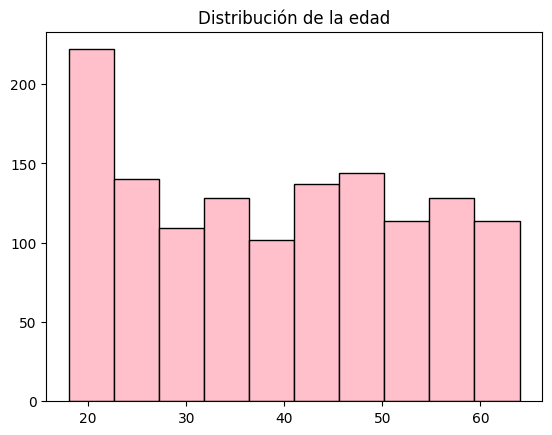

In [132]:
#Histograma rangos de edad
plt.hist(gastos['edad'], bins=10, edgecolor='black', color='pink')
plt.title('Distribución de la edad')
plt.show()

#Punto 3

In [108]:
# Distribución de acuerdo al número de hijos
tab_frec_hijos = gastos.groupby('hijos').size().sort_values(ascending=False).reset_index()
tab_frec_hijos.columns = ['Hijos','Frecuencia']
tab_frec_hijos['Porcentaje'] = tab_frec_hijos['Frecuencia']/tab_frec_hijos['Frecuencia'].sum()*100
tab_frec_hijos['Porcentaje Acumulado'] = tab_frec_hijos['Porcentaje'].cumsum()
tab_frec_hijos

,Hijos,Frecuencia,Porcentaje,Porcentaje Acumulado
0,0,574,42.899851,42.899851
1,1,324,24.215247,67.115097
2,2,240,17.937220,85.052317
3,3,157,11.733931,96.786248
4,4,25,1.868460,98.654709
5,5,18,1.345291,100.000000


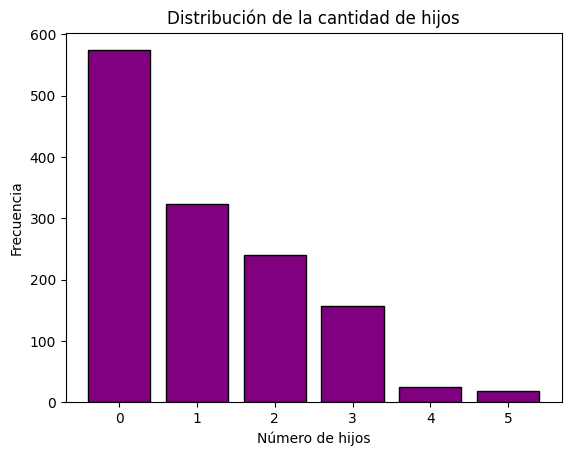

In [135]:
plt.bar(tab_frec_hijos['Hijos'], tab_frec_hijos['Frecuencia'], edgecolor='black', color='purple')
plt.title('Distribución de la cantidad de hijos')
plt.xlabel('Número de hijos')
plt.ylabel('Frecuencia')
plt.show()

# Punto 4

In [110]:
# Distribución de acuerdo a la región
tab_frec_region = gastos.groupby('region').size().sort_values(ascending=False).reset_index()
tab_frec_region.columns = ['Region','Frecuencia']
tab_frec_region['Porcentaje'] = tab_frec_region['Frecuencia']/tab_frec_region['Frecuencia'].sum()*100
tab_frec_region['Porcentaje Acumulado'] = tab_frec_region['Porcentaje'].cumsum()
tab_frec_region

,Region,Frecuencia,Porcentaje,Porcentaje Acumulado
0,suroriente,364,27.204783,27.204783
1,noroccidente,325,24.289985,51.494768
2,suroccidente,325,24.289985,75.784753
3,nororiente,324,24.215247,100.000000


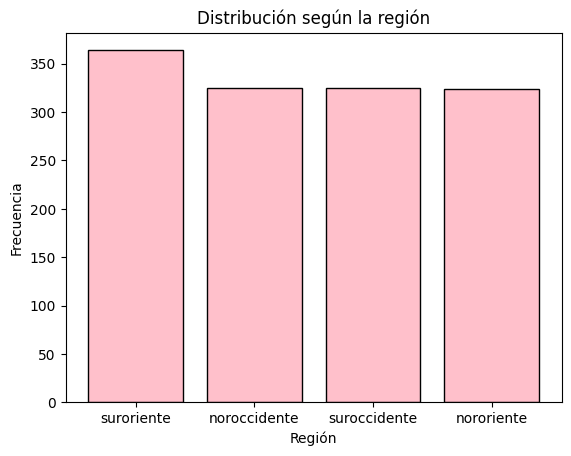

In [134]:
#Gráfico de barras
plt.bar(tab_frec_region['Region'], tab_frec_region['Frecuencia'], edgecolor='black', color='pink')
plt.title('Distribución según la región')
plt.xlabel('Región')
plt.ylabel('Frecuencia')
plt.show()

# Punto 6

In [112]:
# tabla cruzada peso y fumador por número de personas
tab_cruzada_peso_fum= gastos.pivot_table(index='peso', columns='fumador', values='sexo', aggfunc='count', fill_value=0)
tab_cruzada_peso_fum

fumador,no,si
peso,,
bajo peso,16,5
obesidad I,323,74
obesidad II,174,52
obesidad III,72,21
peso normal,171,50
sobrepeso,308,72


In [113]:
# Total de fumadores
total_fumadores = tab_cruzada_peso_fum['si'].sum()
print("Número total de fumadores:", total_fumadores)

Número total de fumadores: 274


In [114]:
# Porcentaje de fumadores
porc_fumadores = (total_fumadores/1338)*100
print("Porcentaje total de fumadores:", porc_fumadores)

Porcentaje total de fumadores: 20.47832585949178


In [115]:
# Total de fumadores con obesidad
obeso_I = tab_cruzada_peso_fum.loc['obesidad I', 'si']
obeso_II = tab_cruzada_peso_fum.loc['obesidad II', 'si']
obeso_III = tab_cruzada_peso_fum.loc['obesidad III', 'si']
total_fumadores_obesidad = obeso_I + obeso_II + obeso_III
print(f"Total de fumadores con obesidad: {total_fumadores_obesidad}")


Total de fumadores con obesidad: 147


In [116]:
# Porcentaje de fumadores con obesidad
porc_fumadores_obesidad = (total_fumadores_obesidad/1338)*100
print("Porcentaje total de fumadores con obesidad:", porc_fumadores_obesidad)

Porcentaje total de fumadores con obesidad: 10.986547085201794


In [117]:
# Tabla cruzada peso y fumador por porcentaje de personas

tab_cruzada_peso_fum_porc = tab_cruzada_peso_fum.div(tab_cruzada_peso_fum.sum(axis=1), axis=0) * 100
tab_cruzada_peso_fum_porc


fumador,no,si
peso,,
bajo peso,76.190476,23.809524
obesidad I,81.360202,18.639798
obesidad II,76.991150,23.008850
obesidad III,77.419355,22.580645
peso normal,77.375566,22.624434
sobrepeso,81.052632,18.947368


# Punto 8

In [118]:
# Resumen estadistico
gastos[["gastos"]].describe()

,gastos
count,1338.000000
mean,13270.422280
std,12110.011272
min,1121.870000
25%,4740.287500
50%,9382.030000
75%,16639.915000
max,63770.430000


In [119]:
#Rango
gastos['gastos'].max() - gastos['gastos'].min()

62648.56

In [120]:
#Coeficiente de variación
(gastos['gastos'].std()/abs(gastos['gastos'].mean()))*100

91.25565876707495

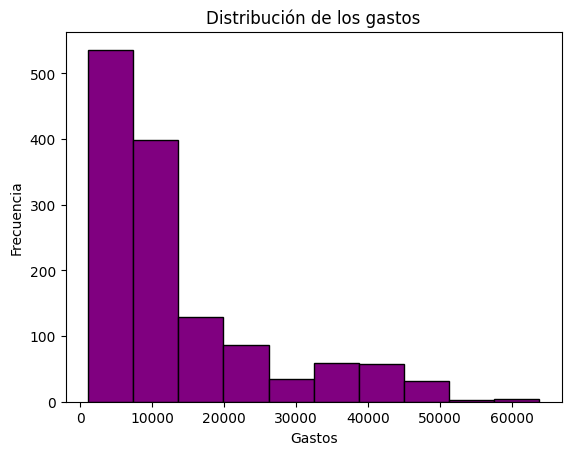

In [138]:
# Histograma
gastos['gastos'].plot.hist(bins=10, edgecolor='black', color='purple')
plt.title('Distribución de los gastos')
plt.xlabel('Gastos')
plt.ylabel('Frecuencia')
plt.show()

# Punto 9

In [122]:
# Estadísticas Descriptivas por Peso
gastos.pivot_table(index='peso', values=['edad'], aggfunc=['mean', 'std', 'max', 'min'], fill_value=0)

,mean,std,max,min
,edad,edad,edad,edad
peso,,,,
bajo peso,32.380952,13.139544,60,18
obesidad I,39.392947,14.323702,64,18
obesidad II,41.783186,14.680051,64,18
obesidad III,40.860215,13.772682,64,18
peso normal,36.764706,13.681402,64,18
sobrepeso,38.873684,13.394751,64,18


In [123]:
# Estadísticas Descriptivas por fumador
gastos.pivot_table(index='fumador', values=['edad'], aggfunc=['mean', 'std', 'max', 'min'], fill_value=0)

,mean,std,max,min
,edad,edad,edad,edad
fumador,,,,
no,39.385338,14.083410,64,18
si,38.514599,13.923186,64,18


In [124]:
gastos['fumador'].describe()


count     1338
unique       2
top         no
freq      1064
Name: fumador, dtype: object

# Punto 10

In [125]:
# Gastos vs edad
gastos.groupby('gastos')['edad'].mean()

gastos
1121.87     18.0
1131.51     18.0
1135.94     18.0
1136.40     18.0
1137.01     18.0
            ... 
55135.40    33.0
58571.07    31.0
60021.40    52.0
62592.87    45.0
63770.43    54.0
Name: edad, Length: 1337, dtype: float64

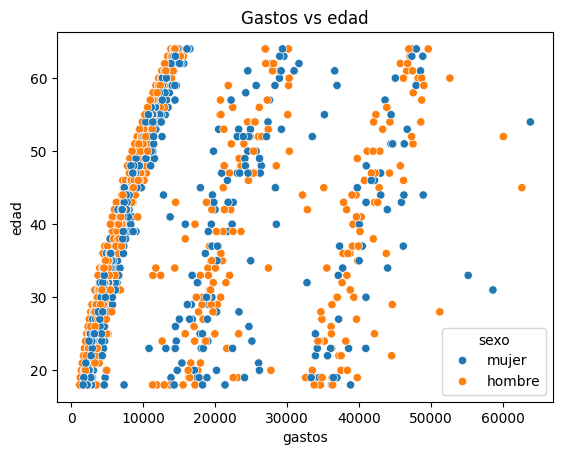

In [139]:
#Gráfico de dispersión
sns.scatterplot(data=gastos, x='gastos', y='edad', hue='sexo')
plt.title('Gastos vs edad')
plt.show()

In [127]:
# Correlación entre gastos y edad
gastos[['gastos','edad']].corr()

,gastos,edad
gastos,1.000000,0.299008
edad,0.299008,1.000000


In [128]:
#Gastos vs IMC
gastos.groupby('gastos')['imc'].mean()

gastos
1121.87     23.210
1131.51     30.140
1135.94     33.330
1136.40     33.660
1137.01     34.100
             ...  
55135.40    35.530
58571.07    38.095
60021.40    34.485
62592.87    30.360
63770.43    47.410
Name: imc, Length: 1337, dtype: float64

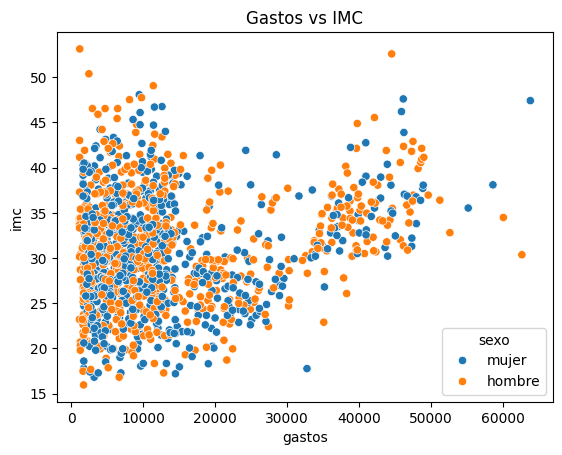

In [140]:
#Gráfico de dispersión
sns.scatterplot(data=gastos, x='gastos', y='imc', hue='sexo')
plt.title('Gastos vs IMC')
plt.show()

In [130]:
# Correlación entre gastos e imc
gastos[['gastos','imc']].corr()

,gastos,imc
gastos,1.000000,0.198341
imc,0.198341,1.000000
